In [ ]:
!pip install transformers pandas tqdm

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Reviews.csv")

# Drop rows with missing or empty reviews
df = df.dropna(subset=['Text'])
df = df[df['Text'].str.strip() != '']

In [ ]:
from transformers import pipeline
import torch

# Check GPU availability
print("GPU available:", torch.cuda.is_available())

# Initialize pipeline with a specific model and device
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0 if torch.cuda.is_available() else -1)

# Test the pipeline
print(sentiment_analyzer("This is a great product!"))



GPU available: False


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998756647109985}]


In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm.auto import tqdm
import os

# Load dataset
df = pd.read_csv("/content/Reviews.csv")


In [ ]:


# Drop missing or empty reviews
df = df.dropna(subset=['Text'])
df = df[df['Text'].str.strip() != '']

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


In [ ]:
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=-1)

In [ ]:
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=-1)

In [ ]:
chunk_size = 1000  # Process 1000 rows at a time
output_file = "processed_reviews_with_sentiment.csv"

In [ ]:
if os.path.exists(output_file):
    processed_df = pd.read_csv(output_file)
    processed_ids = set(processed_df['Id'])
else:
    processed_df = pd.DataFrame()
    processed_ids = set()

In [ ]:
with tqdm(total=len(df)) as pbar:
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]

        # Skip already processed rows
        chunk = chunk[~chunk['Id'].isin(processed_ids)]
        if chunk.empty:
            continue

  0%|          | 0/102161 [00:00<?, ?it/s]

In [ ]:
# Apply sentiment analysis
results = sentiment_analyzer(chunk['Text'].tolist(), truncation=True)
sentiments = [(res['label'], res['score']) for res in results]

# Add to chunk and save
chunk['sentiment'], chunk['confidence'] = zip(*sentiments)
processed_df = pd.concat([processed_df, chunk], ignore_index=True)
processed_df.to_csv(output_file, index=False)

In [ ]:
import time  # Add this at the top of your script

# Inside the loop, after processing each chunk:
time.sleep(0.1)  # Sleep for 100 milliseconds

In [ ]:
print(f"Processing chunk {start} to {end}")
df = df.sample(n=1000)  # Randomly sample 1000 rows for testing

Processing chunk 0 to 64


In [ ]:
# Process data in chunks
with tqdm(total=len(df)) as pbar:
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]

        # Skip already processed rows
        chunk = chunk[~chunk['Id'].isin(processed_ids)]
        if chunk.empty:
            continue

        # Apply sentiment analysis
        results = sentiment_analyzer(chunk['Text'].tolist(), truncation=True)
        sentiments = [(res['label'], res['score']) for res in results]

        # Add to chunk and save
        chunk['sentiment'], chunk['confidence'] = zip(*sentiments)
        processed_df = pd.concat([processed_df, chunk], ignore_index=True)
        processed_df.to_csv(output_file, index=False)

        pbar.update(len(chunk))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(processed_df.head())  # Display the first few rows of the DataFrame

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


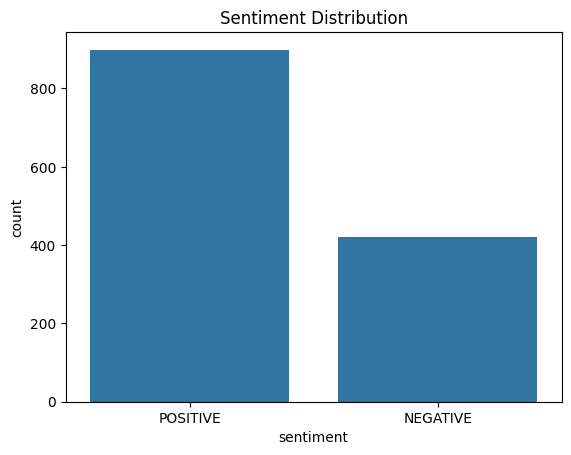

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=processed_df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
processed_df.to_csv('sentiment_analysis_results.csv', index=False)

In [ ]:
processed_df  # Just type the DataFrame name in a cell

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,confidence
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,POSITIVE,0.998385
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE,0.999525
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,POSITIVE,0.999765
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,POSITIVE,0.999153
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,POSITIVE,0.998708
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,87210,B001EO616S,A2TKKLZTJV4NLV,A. Fisher,7,7,4,1245715200,Very good honey,"This honey is very good, but I had a problem w...",POSITIVE,0.999442
1316,20240,B005KEYYGW,AIZ2WW0Q88QIP,"Med ""medever""",2,2,5,1325203200,warm and cozy,My teenager loves this tea. It only seems to ...,POSITIVE,0.999884
1317,1452,B003OB2EP6,A2S7HFJI52FBSM,Brenna,0,0,5,1338249600,Good,Im on a quest to try all the Ramen Flavors. Ra...,POSITIVE,0.996908
1318,64294,B008HRZ3GE,A11QWUA100WXP1,lvnvrio,0,0,5,1346889600,Wonderful hard-to-find beverage,I first experienced elderflower while in Engla...,POSITIVE,0.999779


In [ ]:
print(processed_df['confidence'].describe())

count    1320.000000
mean        0.974897
std         0.072735
min         0.522408
25%         0.991186
50%         0.998634
75%         0.999599
max         0.999891
Name: confidence, dtype: float64


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


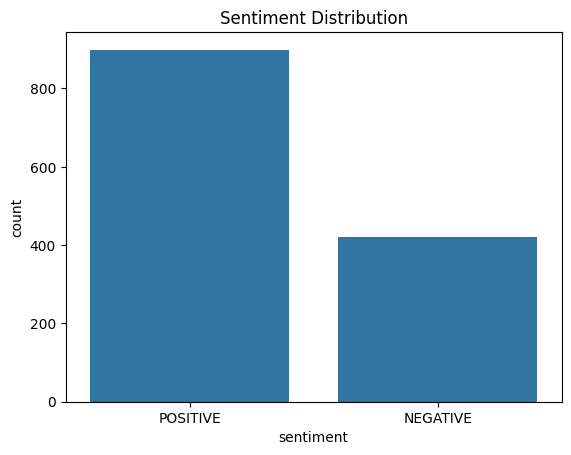

count    1320.000000
mean        0.974897
std         0.072735
min         0.522408
25%         0.991186
50%         0.998634
75%         0.999599
max         0.999891
Name: confidence, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming processed_df is your DataFrame with sentiment analysis results
# Display the first few rows
print(processed_df.head())

# Plot sentiment distribution
sns.countplot(data=processed_df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

# Save results to CSV
processed_df.to_csv('sentiment_analysis_results.csv', index=False)

# Display summary statistics
print(processed_df['confidence'].describe())